In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import plotly.express as px
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.preprocessing import LabelEncoder
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/human-resources/ABOUT DATA.txt
/kaggle/input/human-resources/human_resources.csv


In [75]:
human_resources = pd.read_csv('../input/human-resources/human_resources.csv')
human_resources.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,1001,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0,sales,low
1,1002,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0,sales,medium
2,1003,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0,sales,medium
3,1004,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0,sales,low
4,1005,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0,sales,low


In [76]:
human_resources.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14992.000000,14996.000000,14995.000000,14997.000000,14997.000000,14997.000000,14998.000000,14999.000000
mean,8500.000000,0.612818,0.716178,3.806602,201.048610,3.500033,0.144562,0.238098,0.021268
std,4329.982679,0.248620,0.171306,1.301571,49.945083,1.476165,0.351671,0.425934,0.144281
min,1001.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,8500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,12249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,15999.000000,1.120000,1.550000,55.000000,310.000000,30.000000,1.000000,1.000000,1.000000


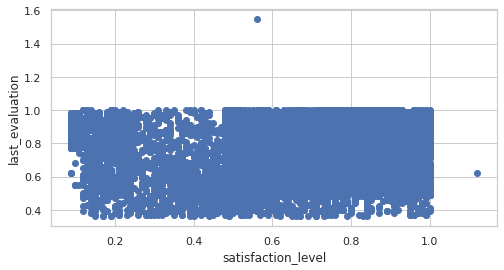

In [77]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(human_resources['satisfaction_level'], human_resources['last_evaluation'])
ax.set_xlabel('satisfaction_level')
ax.set_ylabel('last_evaluation')
plt.show()

In [78]:
human_resources['satisfaction_level'].values[human_resources['satisfaction_level'] > 1] = 1
human_resources['last_evaluation'].values[human_resources['last_evaluation'] > 1] = 1

In [79]:
human_resources.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14992.000000,14996.000000,14995.000000,14997.000000,14997.000000,14997.000000,14998.000000,14999.000000
mean,8500.000000,0.612809,0.716142,3.806602,201.048610,3.500033,0.144562,0.238098,0.021268
std,4329.982679,0.248605,0.171186,1.301571,49.945083,1.476165,0.351671,0.425934,0.144281
min,1001.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,8500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,12249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,15999.000000,1.000000,1.000000,55.000000,310.000000,30.000000,1.000000,1.000000,1.000000


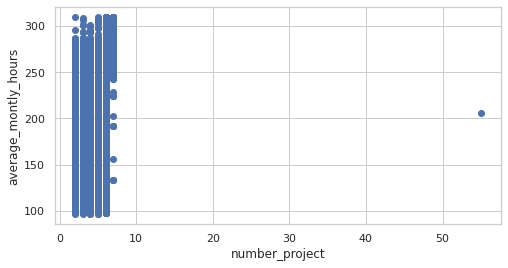

In [80]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(human_resources['number_project'], human_resources['average_montly_hours'])
ax.set_xlabel('number_project')
ax.set_ylabel('average_montly_hours')
plt.show()

In [81]:
human_resources.at[[14987],'number_project']=human_resources["number_project"].mode().iloc[0]

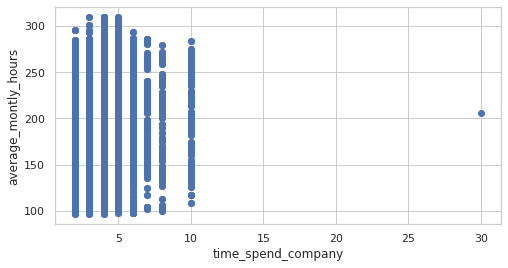

In [82]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(human_resources['time_spend_company'], human_resources['average_montly_hours'])
ax.set_xlabel('time_spend_company')
ax.set_ylabel('average_montly_hours')
plt.show()

In [83]:
grouped_multiple_time_spend_company = human_resources.groupby(['dept']).agg({'time_spend_company': ['mean']})
grouped_multiple_time_spend_company.columns = ['_mean']
grouped_multiple_time_spend_company = grouped_multiple_time_spend_company.reset_index()
print(grouped_multiple_time_spend_company)

           dept     _mean
0            IT  3.468189
1         RandD  3.367217
2         Sales  3.666667
3    accounting  3.522816
4            hr  3.356369
5            iT  4.000000
6    management  4.303175
7     marketing  3.569930
8   product_mng  3.475610
9         sales  3.534091
10      support  3.393980
11     suppport  3.000000
12    technical  3.420375
13   technicall  5.000000


In [84]:
human_resources.at[[14987],'time_spend_company']=human_resources.groupby('dept')['time_spend_company'].transform('mean').apply(np.ceil)

In [85]:
#kaç tane boş veri var onu buluyoruz
human_resources.isnull().sum().sum()

22

In [86]:
#boş veriler hangi sütunlarda ona bakıyoruz
null_columns=human_resources.columns[human_resources.isnull().any()]
human_resources[null_columns].isnull().sum()

satisfaction_level      7
last_evaluation         3
number_project          4
average_montly_hours    2
time_spend_company      2
Work_accident           2
left                    1
dept                    1
dtype: int64

In [87]:
#Boş verilerin nerede olduğunu buluyoruz
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

       satisfaction_level  last_evaluation  number_project  \
5136                  NaN             0.60             5.0   
5156                 0.99             0.76             4.0   
5160                 0.52              NaN             3.0   
5220                 0.53              NaN             4.0   
5272                 0.80             0.76             NaN   
5281                  NaN              NaN             NaN   
5291                  NaN             0.70             6.0   
5300                  NaN             0.69             NaN   
5318                 0.88             0.93             NaN   
9120                  NaN             0.71             6.0   
9121                  NaN             0.63             5.0   
14987                 NaN             0.70             4.0   

       average_montly_hours  time_spend_company  Work_accident  left  \
5136                  249.0                 4.0            0.0   0.0   
5156                    NaN                 5.0  

In [88]:
#dept verilerini gruplayarak aykırı departmanları tespit ediyoruz
groupby_dept = human_resources.groupby('dept')
groupby_dept.max()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
dept,,,,,,,,,,
IT,15939,1.00,1.00,7.0,308.0,10.0,1.0,1.0,1,medium
RandD,15944,1.00,1.00,7.0,308.0,8.0,1.0,1.0,1,medium
Sales,1088,0.92,0.85,5.0,259.0,5.0,0.0,1.0,0,low
accounting,15975,1.00,1.00,7.0,310.0,10.0,1.0,1.0,1,medium
hr,15979,1.00,1.00,7.0,310.0,8.0,1.0,1.0,1,medium
iT,1148,0.11,0.87,6.0,306.0,4.0,0.0,1.0,0,low
management,15950,1.00,1.00,7.0,307.0,10.0,1.0,1.0,1,medium
marketing,15953,1.00,1.00,7.0,310.0,10.0,1.0,1.0,1,medium
product_mng,15938,1.00,1.00,7.0,310.0,10.0,1.0,1.0,0,medium


In [89]:
#aykırı değerleri düzgün hale getiriyoruz
human_resources[['dept']] =human_resources[['dept']].replace(to_replace=
                                           ['Sales','suppport','IT','iT','technicall'],
                                           value=['sales','support','it','it','technical'], regex=True)

In [90]:
#değerleri düzgün hale getiriyoruz
human_resources[['dept']] =human_resources[['dept']].replace(to_replace=
                                           ['management','RanD','product_mng','marketing','support','it','sales','technical','hr','accounting'],
                                           value=['Management','Rand','Product Management','Marketing','Support','Information Technologies','Sales','Technical','Human Resources','Accounting'], regex=True)

In [91]:
human_resources.dept.unique()

array(['Sales', 'Accounting', 'Human Resources', 'Technical', 'Support',
       'Management', 'Information Technologies', 'Product Management',
       'Marketing', 'RandD', nan], dtype=object)

In [92]:
#salary verilerini gruplayarak aykırı departmanları tespit ediyoruz
groupby_dept = human_resources.groupby('salary')
groupby_dept.max()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,,
high,15981,1.00,1.00,7.0,307.0,10.0,1.0,1.0,1
loow,1046,0.84,0.74,3.0,182.0,4.0,0.0,1.0,0
low,15999,1.00,1.00,7.0,310.0,10.0,1.0,1.0,1
medium,15986,1.00,1.00,7.0,310.0,10.0,1.0,1.0,1


In [93]:
#değerleri düzgün hale getiriyoruz
human_resources[['salary']] =human_resources[['salary']].replace(to_replace=
                                           ['loow'],
                                           value=['low'], regex=True)

In [94]:
human_resources.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [95]:
#Öncelikle dept sütununun NaN değerini en çok tekrar eden departmanla doldurmak için modu tespit ediyorum
human_resources["dept"].mode().iloc[0]

'Sales'

In [96]:
#NaN dept verisini dept moduna göre dolduruyorum
human_resources['dept'] = human_resources['dept'].fillna(human_resources["dept"].mode().iloc[0])
display(human_resources.iloc[5160])

empid                      6161
satisfaction_level         0.52
last_evaluation             NaN
number_project             3.00
average_montly_hours     253.00
time_spend_company         2.00
Work_accident              0.00
left                       0.00
promotion_last_5years         0
dept                      Sales
salary                   medium
Name: 5160, dtype: object

In [97]:
#NaN dept kalmadı
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

       satisfaction_level  last_evaluation  number_project  \
5136                  NaN             0.60             5.0   
5156                 0.99             0.76             4.0   
5160                 0.52              NaN             3.0   
5220                 0.53              NaN             4.0   
5272                 0.80             0.76             NaN   
5281                  NaN              NaN             NaN   
5291                  NaN             0.70             6.0   
5300                  NaN             0.69             NaN   
5318                 0.88             0.93             NaN   
9120                  NaN             0.71             6.0   
9121                  NaN             0.63             5.0   
14987                 NaN             0.70             4.0   

       average_montly_hours  time_spend_company  Work_accident  left  \
5136                  249.0                 4.0            0.0   0.0   
5156                    NaN                 5.0  

In [98]:
#NaN memnuniyet seviyelerini doldurmak için her departmanın memnuniyet oranının özelliklerini yazdırıyorum
grouped_multiple = human_resources.groupby(['dept']).agg({'satisfaction_level': ['mean']})
grouped_multiple.columns = ['_mean']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

                       dept     _mean
0                Accounting  0.582151
1           Human Resources  0.598809
2  Information Technologies  0.618142
3                Management  0.621349
4                 Marketing  0.618601
5        Product Management  0.619634
6                     RandD  0.619822
7                     Sales  0.614425
8                   Support  0.618353
9                 Technical  0.607750


#Id lere bakarak hangi departmana ait olduğuna göre memnuniyet oranını yazıyorum
human_resources.at[[5136,5281,5291],'satisfaction_level']=0.614425
human_resources.at[[5300,9120,9121,14987],'satisfaction_level']=0.607750

In [99]:
human_resources['satisfaction_level'] = human_resources['satisfaction_level'].fillna(human_resources.groupby('dept')['satisfaction_level'].transform('mean'))

In [100]:
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

      satisfaction_level  last_evaluation  number_project  \
5156            0.990000             0.76             4.0   
5160            0.520000              NaN             3.0   
5220            0.530000              NaN             4.0   
5272            0.800000             0.76             NaN   
5281            0.614425              NaN             NaN   
5291            0.614425             0.70             6.0   
5300            0.607750             0.69             NaN   
5318            0.880000             0.93             NaN   

      average_montly_hours  time_spend_company  Work_accident  left  \
5156                   NaN                 5.0            0.0   0.0   
5160                 253.0                 2.0            0.0   0.0   
5220                 185.0                 NaN            0.0   0.0   
5272                 270.0                 2.0            NaN   0.0   
5281                 143.0                 NaN            0.0   0.0   
5291                   N

In [101]:
#NaN proje sayılarını doldurmak için proje sayılarının modunu alarak dolduruyorum
human_resources['number_project'] = human_resources['number_project'].fillna(human_resources["number_project"].mode().iloc[0])

In [102]:
#Dolu hali
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

      satisfaction_level  last_evaluation  number_project  \
5156            0.990000             0.76             4.0   
5160            0.520000              NaN             3.0   
5220            0.530000              NaN             4.0   
5272            0.800000             0.76             4.0   
5281            0.614425              NaN             4.0   
5291            0.614425             0.70             6.0   
5318            0.880000             0.93             4.0   

      average_montly_hours  time_spend_company  Work_accident  left  \
5156                   NaN                 5.0            0.0   0.0   
5160                 253.0                 2.0            0.0   0.0   
5220                 185.0                 NaN            0.0   0.0   
5272                 270.0                 2.0            NaN   0.0   
5281                 143.0                 NaN            0.0   0.0   
5291                   NaN                 3.0            0.0   0.0   
5318          

In [103]:
#Çalışanın işi hakkındaki değerlendirmesini departmana göre guruplayarak her departmanın işi hakkındaki 
#değerlendirmesinin ortalamasını buluyorum
grouped_multiple_last_evaluation = human_resources.groupby(['dept','left']).agg({'last_evaluation': ['mean']})
grouped_multiple_last_evaluation.columns = ['_mean']
grouped_multiple_last_evaluation = grouped_multiple_last_evaluation.reset_index()
print(grouped_multiple_last_evaluation)

                        dept  left     _mean
0                 Accounting   0.0  0.726128
1                 Accounting   1.0  0.694510
2            Human Resources   0.0  0.721224
3            Human Resources   1.0  0.679721
4   Information Technologies   0.0  0.713050
5   Information Technologies   1.0  0.730037
6                 Management   0.0  0.723451
7                 Management   1.0  0.727253
8                  Marketing   0.0  0.723282
9                  Marketing   1.0  0.692020
10        Product Management   0.0  0.712060
11        Product Management   1.0  0.726566
12                     RandD   0.0  0.706081
13                     RandD   1.0  0.745372
14                     Sales   0.0  0.709232
15                     Sales   1.0  0.711243
16                   Support   0.0  0.721537
17                   Support   1.0  0.727315
18                 Technical   0.0  0.716609
19                 Technical   1.0  0.734132


#Id lere göre NaN değereri ilgili deparmtmanın ortalamalarıyla dolduruyorum
human_resources.at[[5160,5281],'last_evaluation']=0.709725
human_resources.at[[5220],'last_evaluation']=0.709133

In [104]:
human_resources['last_evaluation'] = human_resources['last_evaluation'].fillna(human_resources.groupby(['dept','left'])['last_evaluation'].transform('mean'))

In [105]:
#Dolu hali
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

      satisfaction_level  last_evaluation  number_project  \
5156            0.990000         0.760000             4.0   
5220            0.530000         0.721224             4.0   
5272            0.800000         0.760000             4.0   
5281            0.614425         0.709232             4.0   
5291            0.614425         0.700000             6.0   
5318            0.880000         0.930000             4.0   

      average_montly_hours  time_spend_company  Work_accident  left  \
5156                   NaN                 5.0            0.0   0.0   
5220                 185.0                 NaN            0.0   0.0   
5272                 270.0                 2.0            NaN   0.0   
5281                 143.0                 NaN            0.0   0.0   
5291                   NaN                 3.0            0.0   0.0   
5318                 195.0                 2.0            NaN   NaN   

                 dept  
5156        Technical  
5220  Human Resources  
52

In [106]:
#Çalışanın aylık ortalama çalıştığı saati için mean kullanıyorum
human_resources['average_montly_hours'] = human_resources['average_montly_hours'].fillna(human_resources["average_montly_hours"].mean())

In [107]:
#Dolu hali
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

      satisfaction_level  last_evaluation  number_project  \
5220            0.530000         0.721224             4.0   
5272            0.800000         0.760000             4.0   
5281            0.614425         0.709232             4.0   
5318            0.880000         0.930000             4.0   

      average_montly_hours  time_spend_company  Work_accident  left  \
5220                 185.0                 NaN            0.0   0.0   
5272                 270.0                 2.0            NaN   0.0   
5281                 143.0                 NaN            0.0   0.0   
5318                 195.0                 2.0            NaN   NaN   

                 dept  
5220  Human Resources  
5272        Marketing  
5281            Sales  
5318          Support  


In [108]:
#Çalışanın şirkette çalıştığı süre için departmana göre ortalama buluyorum
grouped_multiple_time_spend_company = human_resources.groupby(['dept']).agg({'time_spend_company': ['mean']})
grouped_multiple_time_spend_company.columns = ['_mean']
grouped_multiple_time_spend_company = grouped_multiple_time_spend_company.reset_index()
print(grouped_multiple_time_spend_company)

                       dept     _mean
0                Accounting  3.522816
1           Human Resources  3.356369
2  Information Technologies  3.468623
3                Management  4.303175
4                 Marketing  3.569930
5        Product Management  3.475610
6                     RandD  3.367217
7                     Sales  3.533816
8                   Support  3.393627
9                 Technical  3.411397


In [109]:
#Id lere göre ilgili ortalamaları NaN değerlerin yerine yazıyorum
human_resources['time_spend_company'] = human_resources['time_spend_company'].fillna(human_resources.groupby('dept')['time_spend_company'].transform('mean').apply(np.ceil))

In [110]:
#Dolu Hali
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

      satisfaction_level  last_evaluation  number_project  \
5272                0.80             0.76             4.0   
5318                0.88             0.93             4.0   

      average_montly_hours  time_spend_company  Work_accident  left       dept  
5272                 270.0                 2.0            NaN   0.0  Marketing  
5318                 195.0                 2.0            NaN   NaN    Support  


In [111]:
#İş kazası sütunu için NaN değerleri mod a göre dolduruyorum
human_resources['Work_accident'] = human_resources['Work_accident'].fillna(human_resources["Work_accident"].mode().iloc[0])

In [112]:
#Dolu hali
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

      satisfaction_level  last_evaluation  number_project  \
5318                0.88             0.93             4.0   

      average_montly_hours  time_spend_company  Work_accident  left     dept  
5318                 195.0                 2.0            0.0   NaN  Support  


In [113]:
grouped_multiple_left = human_resources.groupby(['dept']).agg({'left': ['mean']})
grouped_multiple_left.columns = ['_mean']
grouped_multiple_left = grouped_multiple_left.reset_index()
print(grouped_multiple_left)

                       dept     _mean
0                Accounting  0.265971
1           Human Resources  0.290934
2  Information Technologies  0.222494
3                Management  0.144444
4                 Marketing  0.236597
5        Product Management  0.219512
6                     RandD  0.153748
7                     Sales  0.244868
8                   Support  0.249214
9                 Technical  0.256250


In [114]:
human_resources['left'] = human_resources['left'].fillna(human_resources.groupby('dept')['left'].transform('mean').apply(lambda x: 1 if x >= 0.5 else 0))

In [115]:
#Dolu hali
print(human_resources[human_resources.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, dept]
Index: []


In [116]:
human_resources.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,1001,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0,Sales,low
1,1002,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0,Sales,medium
2,1003,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0,Sales,medium
3,1004,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0,Sales,low
4,1005,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0,Sales,low


In [117]:
human_resources_deptgroup = human_resources.groupby(['dept'],as_index = False).agg({'satisfaction_level': 'mean'})
human_resources_deptgroup

,dept,satisfaction_level
0,Accounting,0.582151
1,Human Resources,0.598809
2,Information Technologies,0.618142
3,Management,0.621349
4,Marketing,0.618601
5,Product Management,0.619634
6,RandD,0.619822
7,Sales,0.614425
8,Support,0.618353
9,Technical,0.607750


In [118]:
fig = px.pie(human_resources_deptgroup, values='satisfaction_level', names='dept')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

Text(0.5, 1.0, 'Korelasyon Katsayıları')

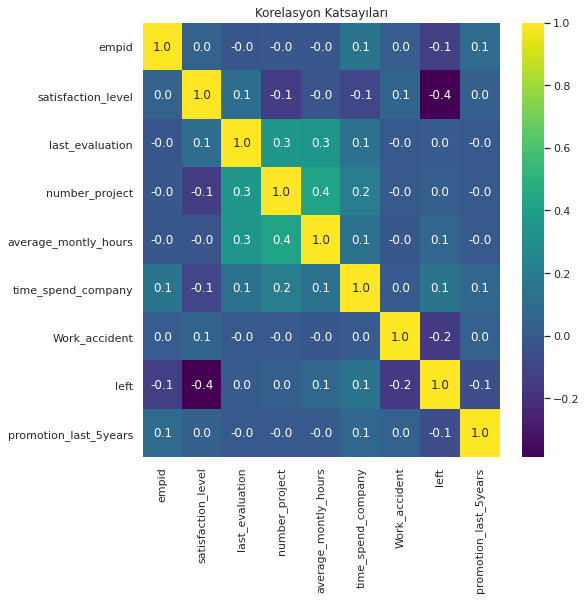

In [119]:
plt.figure(figsize=(8,8))
sns.heatmap(data=human_resources.corr(), annot=True, cmap='viridis', fmt= '.1f')
plt.title('Korelasyon Katsayıları')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



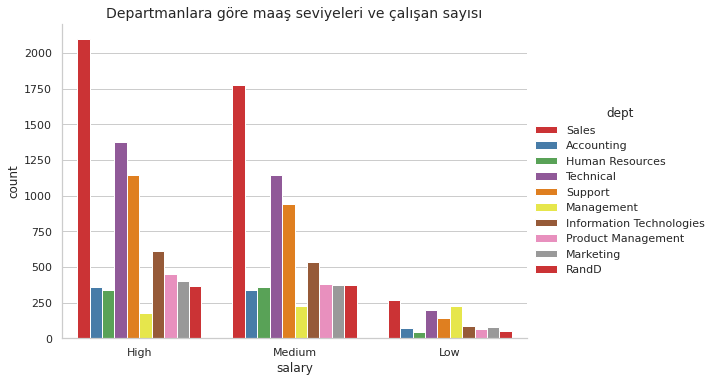

In [120]:
h = sns.factorplot(x = 'salary', hue='dept', kind ='count', size = 5,aspect=1.5, data=human_resources, palette='Set1' )
plt.title("Departmanlara göre maaş seviyeleri ve çalışan sayısı", fontsize=14)
h.set_xticklabels(['High', 'Medium', 'Low']);

In [121]:
human_resources_left = human_resources[human_resources['left'] == 1] # ayrılanlar için ayrı veri seti 
human_resources_notleft = human_resources[human_resources['left'] == 0] # ayrılmayanlar için aynı şekilde

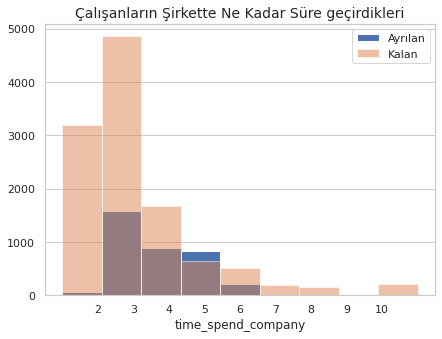

In [122]:
plt.figure(figsize =(7,5))
bins = np.linspace(1.0, 11,10)
plt.hist(human_resources_left['time_spend_company'], bins=bins, alpha=1, label='Ayrılan')
plt.hist(human_resources_notleft['time_spend_company'], bins=bins, alpha = 0.5, label = 'Kalan')
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('time_spend_company')
plt.title('Çalışanların Şirkette Ne Kadar Süre geçirdikleri', fontsize=14)
plt.legend(loc='best');

In [123]:
#groupby_time_spend = human_resources.groupby('time_spend_company').mean()#
#groupby_time_spend['satisfaction_level']

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



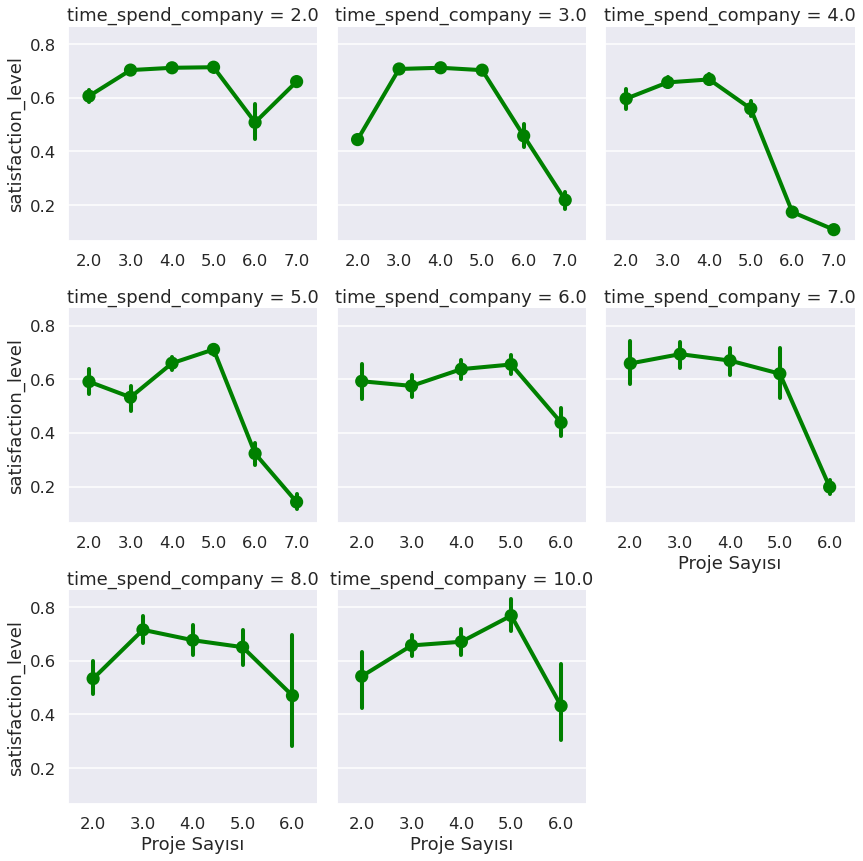

In [124]:
sns.set()
sns.set_context("talk")
ax = sns.factorplot(x="number_project", y="satisfaction_level", col="time_spend_company",col_wrap=3, size=4, color='green',sharex=False, data=human_resources)
ax.set_xlabels('Proje Sayısı');

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



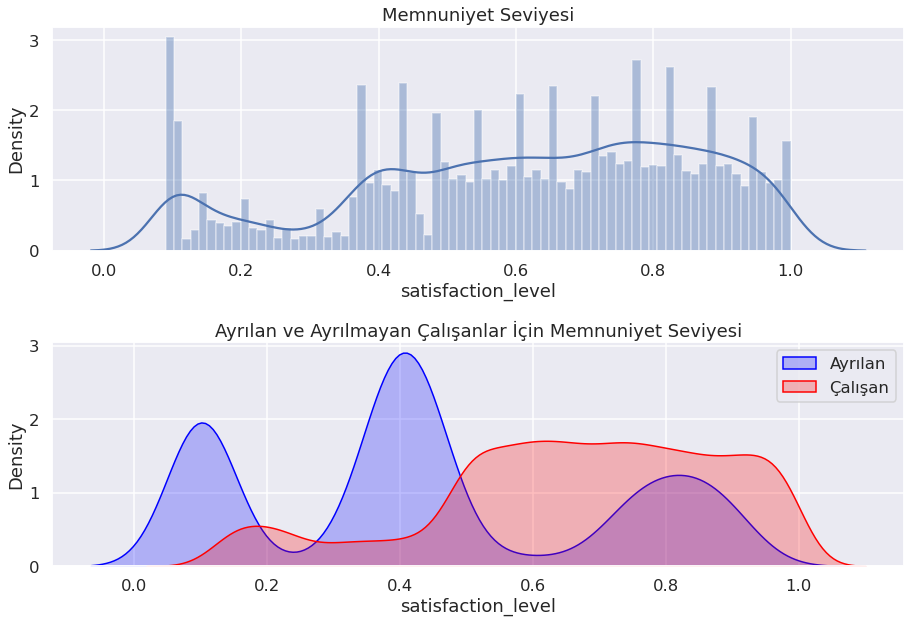

In [125]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(13,9))
sns.distplot(human_resources['satisfaction_level'], bins=75, ax=ax1)
ax1.set_title('Memnuniyet Seviyesi')

sns.kdeplot(human_resources_left['satisfaction_level'], color='blue', ax=ax2, shade=True)
sns.kdeplot(human_resources_notleft['satisfaction_level'], color='red', ax=ax2, shade=True)
ax2.set_title('Ayrılan ve Ayrılmayan Çalışanlar İçin Memnuniyet Seviyesi')
ax2.legend(['Ayrılan', 'Çalışan'])


plt.tight_layout()

Text(0.5, 1.0, 'Çalışanların memnuniyet seviyesi ve son değerlendirmesine göre ayrılıp ayrılmaması')

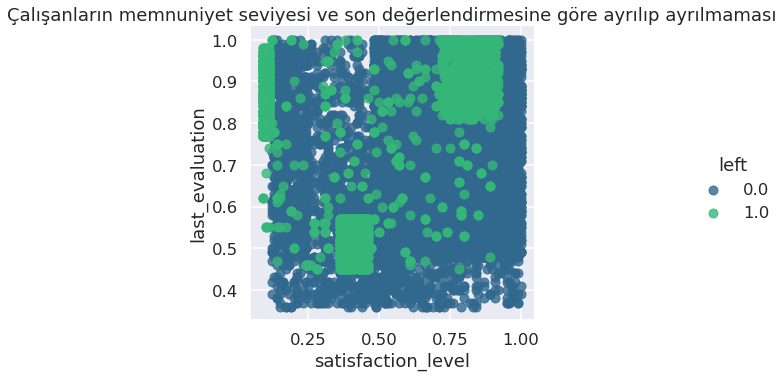

In [126]:
sns.lmplot(x='satisfaction_level', y = 'last_evaluation', hue='left', data=human_resources, palette='viridis',
          fit_reg=False)
plt.title('Çalışanların memnuniyet seviyesi ve son değerlendirmesine göre ayrılıp ayrılmaması')

1. -Daha yüksek son değerlendirme ve memnuniyete sahip çalışanlar işten ayrılma eğilimindedir.
* -Daha yüksek son değerlendirme ve daha düşük memnuniyete sahip çalışanlar işten ayrılma eğilimindedir.
1. -Daha düşük son değerlendirmeye ve orta düzeyde memnuniyete sahip çalışanlar işten ayrılma eğilimindedir.

Text(0.5, 1.0, 'Çalışanların memnuniyet seviyesi ve aylık ortalama çalışma saatlerine göre ayrılıp ayrılmaması')

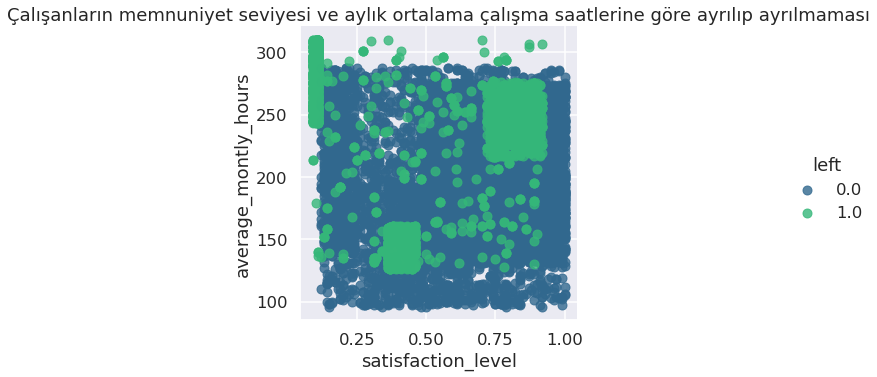

In [127]:
sns.lmplot(x='satisfaction_level', y = 'average_montly_hours', hue='left', data=human_resources, palette='viridis',
          fit_reg=False)
plt.title('Çalışanların memnuniyet seviyesi ve aylık ortalama çalışma saatlerine göre ayrılıp ayrılmaması')

* -Daha yüksek aylık ortalama çalışma saatleri ve memnuniyete sahip çalışanlar işten ayrılma eğilimindedir.
* -Daha yüksek aylık ortalama çalışma saatleri ve daha düşük memnuniyete sahip çalışanlar işten ayrılma eğilimindedir.
* -Daha düşük aylık ortalama çalışma saatleri ve orta düzeyde memnuniyete sahip çalışanlar işten ayrılma eğilimindedir.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



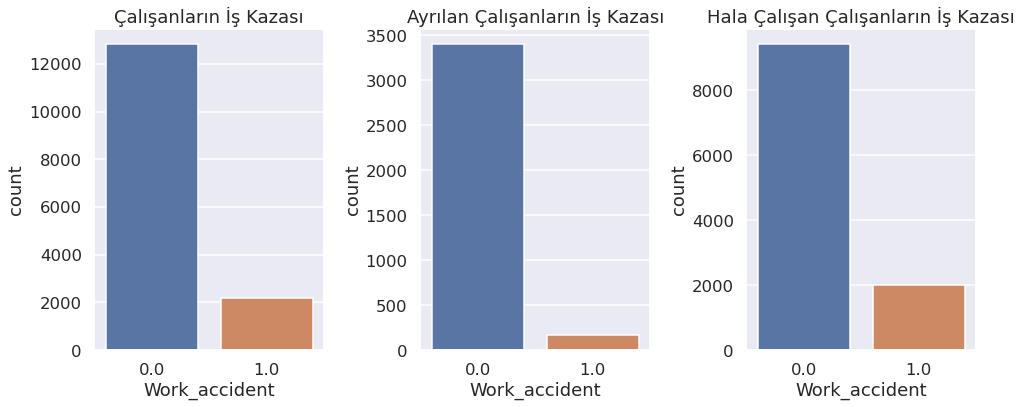

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,6))

sns.countplot(human_resources['Work_accident'], ax=ax1)
ax1.set_title('Çalışanların İş Kazası')

sns.countplot(human_resources_left['Work_accident'], ax=ax2)
ax2.set_title('Ayrılan Çalışanların İş Kazası')

sns.countplot(human_resources_notleft['Work_accident'], ax=ax3)
ax3.set_title('Hala Çalışan Çalışanların İş Kazası')

plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Son 5 Yılda Terfi Alan Çalışanların sayısı 0 = Terfi almadı 1 = Terfi aldı')

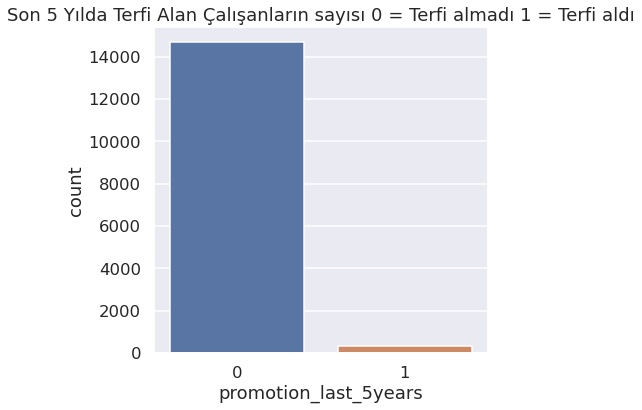

In [232]:
plt.figure(figsize=(6, 6))
sns.countplot(human_resources['promotion_last_5years'])
plt.title('Son 5 Yılda Terfi Alan Çalışanların sayısı 0 = Terfi almadı 1 = Terfi aldı')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Hala Çalışan Çalışanların Maaşları')

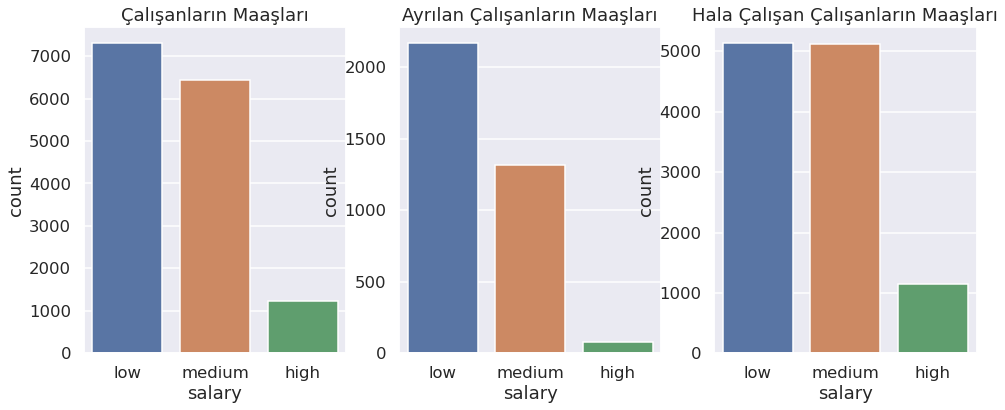

In [130]:
#Let's have a look at the distribution of salary for different groups of employees

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))
sns.countplot(human_resources['salary'], ax=ax1)
ax1.set_title('Çalışanların Maaşları')

sns.countplot(human_resources_left['salary'], 
              ax=ax2)
ax2.set_title('Ayrılan Çalışanların Maaşları')

sns.countplot(human_resources_notleft['salary'], 
              ax=ax3)
ax3.set_title('Hala Çalışan Çalışanların Maaşları')

Text(0.5, 1.0, 'Çalışanların işi hakkındaki son değerlendirmesi ve aylık ortalama çalışma saatlerine göre ayrılıp ayrılmaması')

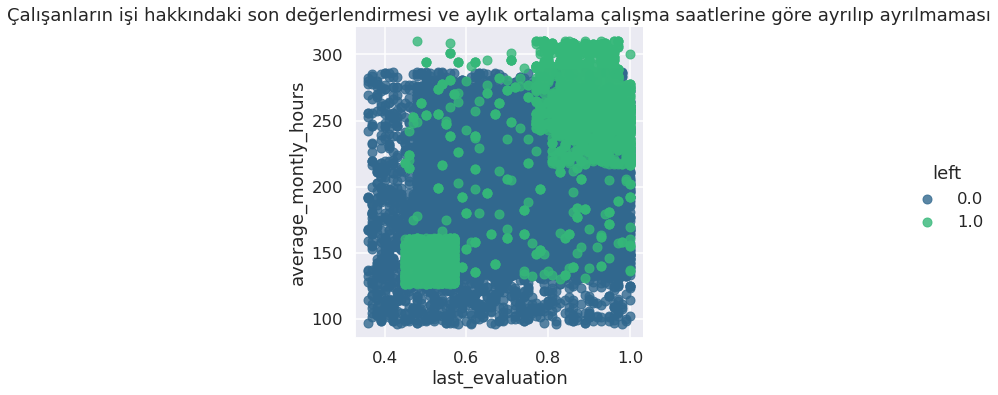

In [234]:
sns.lmplot(x='last_evaluation', y = 'average_montly_hours', hue='left', data=human_resources, palette='viridis',
          fit_reg=False)
plt.title('Çalışanların işi hakkındaki son değerlendirmesi ve aylık ortalama çalışma saatlerine göre ayrılıp ayrılmaması')

1. * Daha yüksek değerlendirme ve ortalama aylık çalışma saatlerine sahip çalışanlar işten ayrılma eğilimindedir.
1. * Daha düşük değerlendirmeye ve ortalama aylık çalışma saatlerine sahip çalışanlar işten ayrılma eğilimindedir.

In [132]:
#işten ayrılan çalışanların işi hakkındaki son değerlendirmesi ortalamasından yüksek olanların sayısı
len(human_resources_left[human_resources_left['last_evaluation'] > 0.5])

2845

In [133]:
#işten yarılanların sayısı
len(human_resources_left)

3571

In [134]:
human_resources_left['satisfaction_level'] = pd.qcut(human_resources_left['satisfaction_level'], q=7, precision = 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan çalışanların memnuniyet düzeyi')

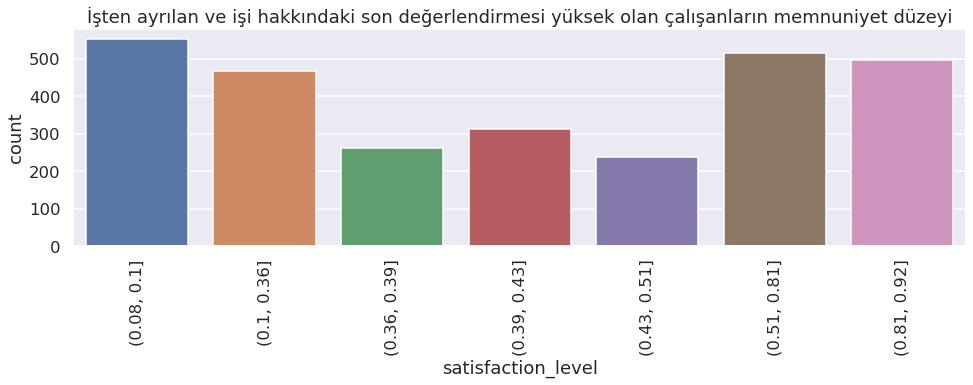

In [135]:
# Çalışanın işi hakkındaki son değerlendirmesi yüksek olanların memnuniyet seviyesi dağılımları

fig = plt.figure(figsize=(16, 4))
sns.countplot(human_resources_left['satisfaction_level'][human_resources_left['last_evaluation'] > 0.5])
plt.xticks(rotation=90)
plt.title('İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan çalışanların memnuniyet düzeyi')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan çalışanların proje sayıları')

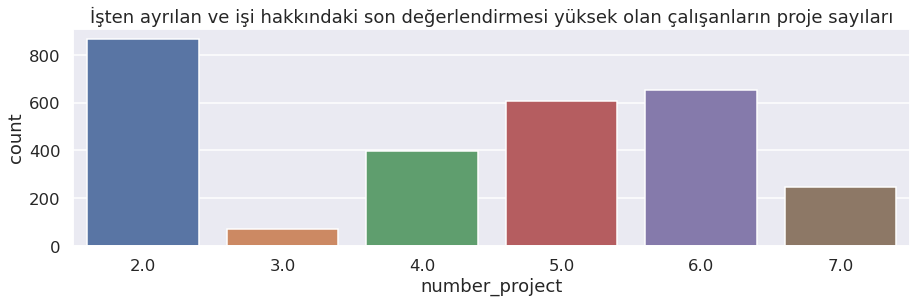

In [136]:
fig = plt.figure(figsize=(15, 4))
sns.countplot(human_resources_left['number_project'][human_resources_left['last_evaluation'] > 0.5])
plt.title('İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan çalışanların proje sayıları')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan çalışanların şirkette çalıştığı süre')

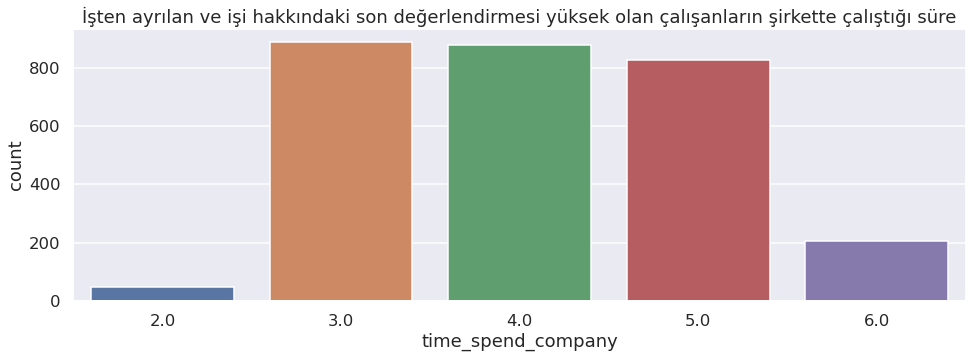

In [137]:
fig = plt.figure(figsize=(16, 5))
sns.countplot(human_resources_left['time_spend_company'][human_resources_left['last_evaluation'] > 0.5])
plt.title('İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan çalışanların şirkette çalıştığı süre')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan çalışanların maaşları')

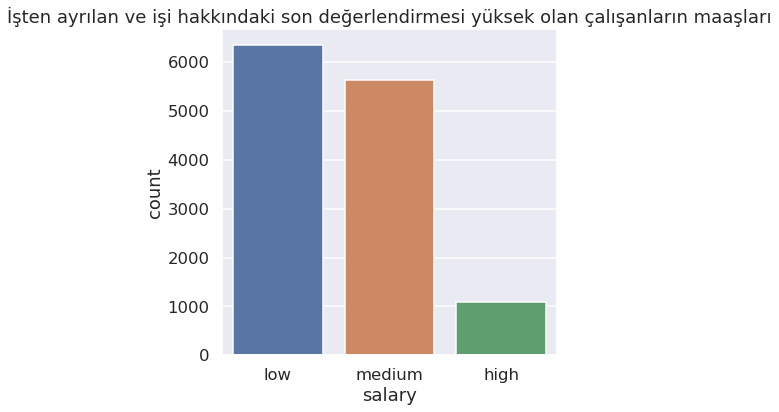

In [138]:
fig = plt.figure(figsize=(6, 6))
sns.countplot(human_resources['salary'][(human_resources['last_evaluation'] > 0.5)])
plt.title('İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan çalışanların maaşları')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan  terfi alan çalışanlar')

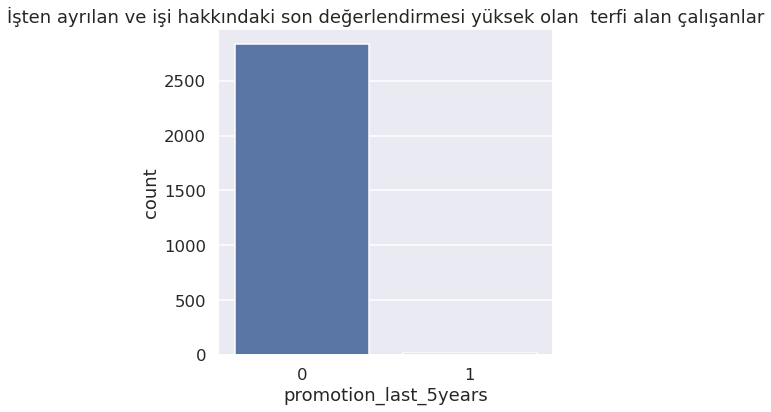

In [139]:
fig = plt.figure(figsize=(6, 6))
sns.countplot(human_resources_left['promotion_last_5years'][human_resources_left['last_evaluation'] > 0.5])
plt.title('İşten ayrılan ve işi hakkındaki son değerlendirmesi yüksek olan  terfi alan çalışanlar')

* KAYNAK: https://www.kaggle.com/neelchakraborty/human-resource-analytics-kaggle
*         https://medium.com/@denizkilinc/python-ile-veri-%C3%B6n-i%CC%87%C5%9Flemeye-dal%C4%B1%C5%9F-f89f921658bd
*         https://medium.com/@hamzaerguder/temiz-veri-nas%C4%B1l-haz%C4%B1rlan%C4%B1r-232ce560d4ad

# Logistic Regression

In [140]:
le_deptlog = LabelEncoder()
le_salarylog = LabelEncoder()

In [141]:
inputs = human_resources.drop('left',axis='columns')

In [142]:
df1 = human_resources.drop(['left'], axis = 'columns')
inputs['dept_n'] = le_deptlog.fit_transform(inputs['dept'])
inputs['salary_n'] = le_salarylog.fit_transform(inputs['salary'])
df1.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1001,0.38,0.53,2.0,157.0,3.0,0.0,0,Sales,low
1,1002,0.80,0.86,5.0,262.0,6.0,0.0,0,Sales,medium
2,1003,0.11,0.88,7.0,272.0,4.0,0.0,0,Sales,medium
3,1004,0.72,0.87,5.0,223.0,5.0,0.0,0,Sales,low
4,1005,0.37,0.52,2.0,159.0,3.0,0.0,0,Sales,low


In [143]:
inputs_n = inputs.drop(['dept','salary'],axis='columns')

In [144]:
inputs_n.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_n,salary_n
0,1001,0.38,0.53,2.0,157.0,3.0,0.0,0,7,1
1,1002,0.80,0.86,5.0,262.0,6.0,0.0,0,7,2
2,1003,0.11,0.88,7.0,272.0,4.0,0.0,0,7,2
3,1004,0.72,0.87,5.0,223.0,5.0,0.0,0,7,1
4,1005,0.37,0.52,2.0,159.0,3.0,0.0,0,7,1


In [145]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,human_resources.left,train_size=0.8)

In [146]:
X_test.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_n,salary_n
1730,2731,0.44,0.55,2.0,141.0,3.0,0.0,0,8,1
13576,14577,0.75,0.59,5.0,149.0,4.0,0.0,0,7,2
1038,2039,0.89,1.00,4.0,237.0,5.0,0.0,0,8,2
12212,13213,0.88,1.00,5.0,219.0,5.0,0.0,0,9,1
13126,14127,0.98,0.67,4.0,209.0,6.0,0.0,0,4,1


In [147]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [148]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [149]:
X_test.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_n,salary_n
1730,2731,0.44,0.55,2.0,141.0,3.0,0.0,0,8,1
13576,14577,0.75,0.59,5.0,149.0,4.0,0.0,0,7,2
1038,2039,0.89,1.00,4.0,237.0,5.0,0.0,0,8,2
12212,13213,0.88,1.00,5.0,219.0,5.0,0.0,0,9,1
13126,14127,0.98,0.67,4.0,209.0,6.0,0.0,0,4,1


In [150]:
y_predicted = model.predict(X_test)
# Cevap
y_predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [151]:
model.predict_proba(X_test)

array([[0.60902128, 0.39097872],
       [0.92542355, 0.07457645],
       [0.76975991, 0.23024009],
       ...,
       [0.83159092, 0.16840908],
       [0.96297775, 0.03702225],
       [0.72181742, 0.27818258]])

In [152]:
model.score(X_test,y_test)

0.7773333333333333

In [153]:
y_predicted = model.predict(X_test)

In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2178,  128],
       [ 540,  154]])

Text(13.5, 0.5, 'Truth')

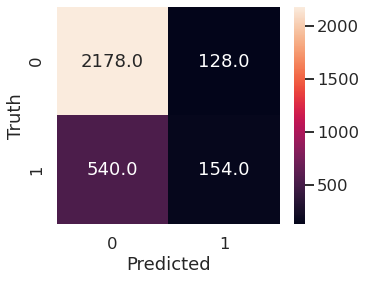

In [155]:
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True,fmt= '.1f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Decision Tree**

In [156]:
le_dept = LabelEncoder()
le_salary = LabelEncoder()

In [157]:
inputs = human_resources.drop('left',axis='columns')

In [158]:
target = human_resources['left']

In [159]:
inputs['dept_n'] = le_dept.fit_transform(inputs['dept'])
inputs['salary_n'] = le_salary.fit_transform(inputs['salary'])

In [160]:
inputs.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,dept_n,salary_n
0,1001,0.38,0.53,2.0,157.0,3.0,0.0,0,Sales,low,7,1
1,1002,0.80,0.86,5.0,262.0,6.0,0.0,0,Sales,medium,7,2
2,1003,0.11,0.88,7.0,272.0,4.0,0.0,0,Sales,medium,7,2
3,1004,0.72,0.87,5.0,223.0,5.0,0.0,0,Sales,low,7,1
4,1005,0.37,0.52,2.0,159.0,3.0,0.0,0,Sales,low,7,1


In [161]:
inputs_n = inputs.drop(['dept','salary'],axis='columns')

In [162]:
inputs_n.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_n,salary_n
0,1001,0.38,0.53,2.0,157.0,3.0,0.0,0,7,1
1,1002,0.80,0.86,5.0,262.0,6.0,0.0,0,7,2
2,1003,0.11,0.88,7.0,272.0,4.0,0.0,0,7,2
3,1004,0.72,0.87,5.0,223.0,5.0,0.0,0,7,1
4,1005,0.37,0.52,2.0,159.0,3.0,0.0,0,7,1


In [163]:
target.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: left, dtype: float64

In [164]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [165]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [166]:
model.score(inputs_n,target)

1.0

In [167]:
model.predict([[0,0,0,0,0,0,0,0,1,1]])

array([1.])

# Test verisi ile yapım

In [168]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.2)

In [169]:
len(X_train)

11999

In [170]:
len(X_test)

3000

In [171]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [172]:
model.score(X_test,y_test)

0.9996666666666667

In [173]:
model.predict([[0,0,0,0,0,0,0,0,1,1]])

array([1.])

# RANDOM FOREST

In [242]:
inputs = human_resources

In [243]:
inputs['dept_n'] = le_dept.fit_transform(inputs['dept'])
inputs['salary_n'] = le_salary.fit_transform(inputs['salary'])

In [244]:
inputs_n = inputs.drop(['dept','salary'],axis='columns')

In [245]:
inputs_n

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_n,salary_n
0,1001,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0,7,1
1,1002,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0,7,2
2,1003,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0,7,2
3,1004,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0,7,1
4,1005,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,15995,0.40,0.57,2.0,151.0,3.0,0.0,1.0,0,8,1
14995,15996,0.37,0.48,2.0,160.0,3.0,0.0,1.0,0,8,1
14996,15997,0.37,0.53,2.0,143.0,3.0,0.0,1.0,0,8,1
14997,15998,0.11,0.96,6.0,280.0,4.0,0.0,1.0,0,8,1


In [246]:
inputs_n['target'] = inputs_n.left

In [247]:
X = inputs_n.drop('target',axis='columns')
y = inputs_n.target

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [249]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [250]:
model.score(X_test, y_test)

1.0

Confusion Matrix

In [251]:
y_predicted = model.predict(X_test)

In [252]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2319,    0],
       [   0,  681]])

Text(13.5, 0.5, 'Truth')

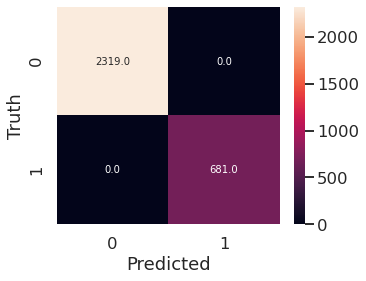

In [253]:
%matplotlib inline
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt= '.1f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Matthews

In [254]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predicted)

1.0

Precision Recall, F-Score

In [259]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predicted, average='macro')

(1.0, 1.0, 1.0, None)

ROC Curve

In [285]:
from sklearn.datasets import make_classification
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline

In [297]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [293]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]

In [294]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.95


In [295]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

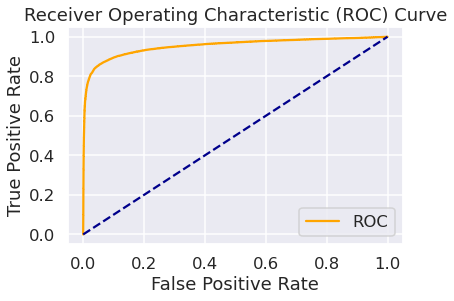

In [298]:
plot_roc_curve(fpr, tpr)

![](http://)<h2 style='color:blue'>KFold cross validation</h2>

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=5)

array([1.        , 1.        , 1.        , 1.        , 0.99866622])

In [189]:
cross_val_score(RandomForestClassifier(n_estimators=3),X, y,cv=5)

array([1.   , 1.   , 0.997, 1.   , 1.   ])

In [190]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),X, y, cv=10)
np.average(scores1)

0.9650666666666666

In [191]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),X, y, cv=10)
np.average(scores2)

0.985

Modeli kaydet

In [192]:
import joblib

In [193]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [194]:
mj = joblib.load('model_joblib')

# GridSearchCV

In [226]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.0005)

In [228]:
len(X_test)

8

In [229]:
len(y_test)

8

In [230]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [231]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



,model,best_score,best_params
0,svm,1.0,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.9,{'n_estimators': 5}
2,logistic_regression,1.0,{'C': 1}
3,decision_tree,0.9,{'criterion': 'entropy'}
